<a href="https://colab.research.google.com/github/cc5547/DeepLearning/blob/main/cc5547/2023_03_30_ch09_DL_01_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서와 Autograd

* 파이토치는 기본적인 수학 계산용 라이브러리를 바탕으로 그 위에 딥러닝에 필요한 그래프 형태 계산 방식을 추가한 라이브러리
* 행렬 계산이 많은 딥러닝의 특성으로 인해 `파이토치의 자료구조 ≠ 기존 파이썬의 자료구조`
    * 예) 텐서 `Tensor`

In [ ]:
import torch # 파이토치 라이브러리 임포트

## 텐서

* 파이토치에서 다양한 수식을 계산하는 데 사용하는 가장 기본적인 자료구조
* 수학의 벡터와 행렬을 일반화한 개념 → 숫자들을 특정한 모양으로 배열
* 차원/랭크`Rank`
    * 랭크 0 텐서 : 숫자가 하나인 스칼라`Scalar` ( `1 / 모양 : []` )
        * tensor.item() -> 스칼라 값만 뽑아주는 메소드
    * 랭크 1 텐서 : 일렬로 숫자를 나열한 벡터`Vector` ( `[1, 2, 3] / 모양 : [3]` )
    * 랭크 2 텐서 : 2차원 행렬`Matrix` ( `[[1,2,3]] / 모양 : [1,3]` )
        * [행, 열]
    * 랭크 3 텐서 : 정육면체 같은 3차원 배열 ( `[[[1,2,3]]] / 모양 : [1,1,3]` )
        * [깊이, 행, 열]
    * 3차원 이상 → 랭크 n 텐서

```
([[1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
```
* 랭크 2 텐서, 2차원 행렬
* 행 3개, 열 3개


In [ ]:
# x 행렬 : 1부터 까지이 숫자를 가로 3줄, 세로 3줄로 배열한 텐서
# 가로와 세로 2차원으로만 이뤄진 랭크 2 텐서
# torch.tensor() -> 텐서를 만들어주는 생성자
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
import numpy as np

x = torch.tensor(np.arange(1, 10).reshape(3, -1))
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
z_ = torch.tensor([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
z_, z_.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],
 
         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([2, 3, 3]))

In [ ]:
z_ = torch.tensor(np.tile(np.arange(1, 10).reshape(3, -1), (2,1)).reshape(2, 3, 3))
z_, z_.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],
 
         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([2, 3, 3]))

In [ ]:
# 배열 모양 준수 (가로, 세로 모양이 같아야함...)
# np.array([[1,2,3,9],[4,5,6],[7,8,9]])
y = torch.tensor([[1,2,3,9],[4,5,6],[7,8,9]])

ValueError: ignored

In [ ]:
# 텐서의 구체적인 형태 = 모든 차원의 원소 개수
print(f"size : {x.size()}") # tensor.size() : 텐서의 크기(모양)
print(f"shape : {x.shape}") # tensor.shape = tensor.size()
# 텐서의 랭크/차원
print(f"랭크(차원) : {x.ndimension()}") # tenosr.ndimension() -> 랭크의 차원값
# len(x) : 원소의 개수

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
# 랭크(차원) 늘리기 -> 랭크/차원이 변화해도 원소 수에는 영향 X
# torch.unsqueeze(tensor, n) # 0번째 차원에 1 차원값을 추가함
x = torch.unsqueeze(x, 0) # 가장 바깥 차원.
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원) : 3


In [ ]:
def add_dimension(n):
    x_ = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    x_ = torch.unsqueeze(x_, n) # torch.unsqueeze(tensor, n) # n번째 차원에 1 차원값을 추가함
    print(x_)
    print(f"size : {x_.size()}")
    print(f"shape : {x_.shape}")
    print(f"랭크(차원) : {x_.ndimension()}")
    return x_ # unsqueeze 된 (랭크가 늘어난 행렬을 반환)

In [ ]:
add_dimension(0)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원) : 3


tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
add_dimension(1)

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
size : torch.Size([3, 1, 3])
shape : torch.Size([3, 1, 3])
랭크(차원) : 3


tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])

In [ ]:
add_dimension(2)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
size : torch.Size([3, 3, 1])
shape : torch.Size([3, 3, 1])
랭크(차원) : 3


tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [ ]:
add_dimension(-1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
size : torch.Size([3, 3, 1])
shape : torch.Size([3, 3, 1])
랭크(차원) : 3


tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [ ]:
try:
    add_dimension(3) # 없는 차원에 추가하려고 했을 때
except Exception as e:
    print(type(e))
    print(e)

<class 'IndexError'>
Dimension out of range (expected to be in range of [-3, 2], but got 3)


In [ ]:
# 랭크(차원) 줄이기 -> 원소 수 영향 X (모양만 변경)
# 2차원 x에 0번째에 1차원(랭크)을 추가해서 3차원으로 변경된 [1, 3, 3]
# torch.squeeze(tensor)
# 차원 별도로 지정 X -> 크기가 1인 차원을 찾아서 알아서 없애줌
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")
x = torch.squeeze(x)
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")
# 1 크기인 맨 앞 차원이 삭제 되면서 [3, 3]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원) : 3
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
x0 = add_dimension(0)
x0  # 0번째에 차원이 추가된 텐서

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size : torch.Size([1, 3, 3])
shape : torch.Size([1, 3, 3])
랭크(차원) : 3


tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
# 0번째 차원이 추가되서 [1, 3, 3] -> [3, 3]
x0 = torch.squeeze(x0)
print(f"size : {x0.size()}")
print(f"shape : {x0.shape}")
print(f"랭크(차원) : {x0.ndimension()}")

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
x1 = add_dimension(1)
x1 = torch.squeeze(x1)
print(f"size : {x1.size()}")
print(f"shape : {x1.shape}")
print(f"랭크(차원) : {x1.ndimension()}")

tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
size : torch.Size([3, 1, 3])
shape : torch.Size([3, 1, 3])
랭크(차원) : 3
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
x2 = add_dimension(2)
x2 = torch.squeeze(x2)
print(f"size : {x2.size()}")
print(f"shape : {x2.shape}")
print(f"랭크(차원) : {x2.ndimension()}")

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
size : torch.Size([3, 3, 1])
shape : torch.Size([3, 3, 1])
랭크(차원) : 3
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
# 크기가 1인 차원이 없을 경우에는 아무 일도 일어나지 않습니다
x2 = torch.squeeze(x2)
print(f"size : {x2.size()}")
print(f"shape : {x2.shape}")
print(f"랭크(차원) : {x2.ndimension()}")

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
# tensor.view(모양) : 직접 텐서의 모양 바꾸기
print(x)
# 랭크 2 (가로, 세로, 배열...) [3, 3] → 랭크 1 [9]
x = x.view(9)
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size : torch.Size([9])
shape : torch.Size([9])
랭크(차원) : 1


In [ ]:
len(x) # 전체 원소 수

9

In [ ]:
# 튜플이나 리스트로 원하는 모양을 넣으면 해당 모양으로 바꿔줌
y = x.view((3, 3))
# 단 전체 원소 수 크기의 약수로 구성하고, 곱하기 한 결과가 전체 원소 수를 넘으면 안됨
print(y)
print(f"size : {y.size()}")
print(f"shape : {y.shape}")
print(f"랭크(차원) : {y.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [ ]:
try:
    # 9개를 2x4로 표현?
    x.view((2, 4))
except Exception as e:
    print(type(e))
    print(e)

<class 'RuntimeError'>
shape '[2, 4]' is invalid for input of size 9


## 텐서 연산과 행렬 곱

* 행렬
    * 랭크 2 텐서
    * 숫자를 네모꼴로 배치한 2차원 배열
    * **행** : 행렬의 높이
    * **열** : 행렬의 너비
* 두 행렬 A, B의 행렬곱 시 조건
    * **A의 열 수**와 **B의 행 수**는 같아야 함
    * 행렬곱 A∙B의 결과 행렬의 행 개수는 A와 같고, 열의 개수는 B와 같음
<br><br>

$
\begin{bmatrix}a&b&c\\d&e&f\\\end{bmatrix}
\begin{bmatrix}g&h\\i&j\\k&l\end{bmatrix}=
\begin{bmatrix}ag+bi+ck&ah+bj+cl\\dg+ei+fk&dh+ej+fl\end{bmatrix}
\\
2\times3\quad\quad\quad3\times2\quad=\quad2\times2 
$
<br><br>

In [ ]:
# 행렬 w : 정규분포에서 무작위 값을 뽑아서 텐서를 생성
# 정규분포(normal distribution) : 평균 0이고 표준편차 1인 확률분포
# torch.randn(행의 크기, 열의 크기, dtype...)
torch.manual_seed(100)
# 실수 내 범위에서 뽑도록
w = torch.randn(5, 3, dtype=torch.float)
# w
# 행렬 x : 직접 실수형 원소들을 넣어서 3 x 2 모양을 가진 텐서를 정의
x = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0]
])
# x
# 행렬 곱을 A(앞), B(행) A의 열과 B의 행이 크기가 일치해야 함
print(f"w size : {w.size()}")
print(f"x size : {x.size()}")
print(f"w : {w}")
print(f"x : {x}")

w size : torch.Size([5, 3])
x size : torch.Size([3, 2])
w : tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134],
        [-0.3172, -0.8660,  1.7482],
        [-0.2759, -0.9755,  0.4790],
        [-2.3652, -0.8047,  0.6587]])
x : tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
torch.manual_seed(10)
# 5, 2 사이즈의 행렬 b, rand n
b = torch.randn(5, 2, dtype=torch.float)
print(f"b size : {b.size()}")
print(f"b : {b}")

b size : torch.Size([5, 2])
b : tensor([[-0.6014, -1.0122],
        [-0.3023, -1.2277],
        [ 0.9198, -0.3485],
        [-0.8692, -0.9582],
        [-1.1920,  1.9050]])


In [ ]:
# w 행렬과 x 행렬 간의 곱 연산
# wx = w * x # 오류 납니다
# w의 열, x의 행 = 3 // w의 행 5, x의 열 2 → shape [5, 2]
# 앞의 배열의 열과 뒤의 배열의 행의 길이가 맞아야 연산 가능 -> 결과물은 앞의 배열의 행과 뒤의 배열의 열 크기를 가지게 됨
# matrix multiplication
wx = torch.mm(w, x)
print(f"wx size : {wx.size()}")
print(f"wx : {wx}")

wx size : torch.Size([5, 2])
wx : tensor([[ -2.4662,  -2.7853],
        [-15.4742, -18.9280],
        [  5.8256,   6.3906],
        [ -0.8074,  -1.5797],
        [ -1.4855,  -3.9966]])


In [ ]:
wx.shape, b.shape

(torch.Size([5, 2]), torch.Size([5, 2]))

In [ ]:
# wx 행렬의 원소에 b 행렬 원소 더하기
# 벡터화 연산
result = wx + b # 벡터화 연산
print(f"result size : {result.size()}")
print(f"result : {result}")

result size : torch.Size([5, 2])
result : tensor([[ -3.0676,  -3.7975],
        [-15.7765, -20.1557],
        [  6.7454,   6.0421],
        [ -1.6766,  -2.5379],
        [ -2.6775,  -2.0916]])


## Autograd
* Auto + gradient
* **수식의 기울기**를 자동으로 계산

* 딥러닝 ⊂ 머신러닝
* 머신러닝 모델은 입력된 데이터를 기반으로 학습
* 아직 충분한 데이터를 보지 못해서 학습이 끝나지 않은 모델의 경우는, 정답이 아닌 결과를 출력할 가능성 ↑

**거리** `distance`
* 데이터에 대한 정답과 머신러닝 모델이 예측한 결과의 차이를 산술적으로 (계산으로, 숫자로) 표현한 것
* 한 개(행) 씩의 데이터

**오차** (손실) `loss` (error)
* 학습한 데이터로 계산한 거리들의 평균
* 전체 데이터 기준
* 오차가 작은 머신러닝 모델일 수록 주어진 데이터에 대해 더 정확한 답을 낸다고 볼 수 있음

* 오차를 줄이고(개선하는) 알고리즘 중에 가장 유명하고 많이 쓰이는 알고리즘 = **경사하강법** `gradient descent`

**경사하강법**
* 오차를 <mark>수학 함수로 표현</mark>한 후, 미분하여 (→기울기) 이 함수의 기울기를 구해서 오차의 최솟값이 있는 방향을 찾아내는 알고리즘
* 경사하강법 → 함수가 수정 → 기울기 → 오차가 최소화하는 지점으로 변동
    * https://youtu.be/GEdLNvPIbiM
    * https://youtu.be/GmtqOlPYB84
    * https://www.youtube.com/@3blue1brown

![경사하강법의 개념도](https://github.com/BigData23th/Data/raw/main/dl_01_01.jpg)

> 파이토치의 Autograd는 미분 계산(기울기 계산)을 자동화하여  경사하강법을 구현하는 수고를 덜어줌

In [ ]:
# 값이 1인 스칼라 텐서 w (weight 가중치)
# w = torch.tensor(1.0)
# 파이토치의 Autograd 기능을 통해 자동으로 기울기 값을 계산하면
# w에 반영되도록 -> w에 대한 미분값을 w.grad에 저장
# requires_grad=True : 해당 토치 텐서에 대해 미분값(기울기)을 계산해서 자동으로 .grad 속성에 저장해주세요
w = torch.tensor(1.0, requires_grad=True)
w # w가 들어간 수학함수가 있다면, 해당 함수가 미분되었을 때 그 값을 w.grad에 반영

tensor(1., requires_grad=True)

In [ ]:
w.grad

In [ ]:
a = w * 3 # a = 3w

In [ ]:
l = a ** 2 # a^2 = (3w)^2 = 9w^2

$l = a^2 = (3w)^2 = 9w^2$

In [ ]:
# l을 w로 미분
# l을 w로 미분하기 위해 연쇄 법칙 (chain rule) 이용
# 미분 시키기
l.backward()
print(f'l을 w로 미분하여 나온 기울기 값은 {w.grad}') # 9 x 2 = 18

l을 w로 미분하여 나온 기울기 값은 18.0


In [ ]:
w.grad

tensor(18.)

# 경사하강법으로 이미지 복원

## 오염된 이미지 문제
* weird_function()를 통해 오염된 이미지가 만들어짐
* 오염된 이미지와 weird_function() 함수를 활용해 원본 이미지를 복원

## 문제 해결
* 오염된 이미지와 크기가 같은 랜덤 텐서(무작위 이미지 텐서)를 생성
* 랜덤 텐서를 weird_function에 입력해 똑같이 오염된 이미지를 생성 → 가설`hypothesis`
    * 원본 이미지 → weird_function() → 오염된 이미지
    * 무작위 이미지 → weird_function() → 가설
* *가설 = 오염된 이미지*라면 *무작위 이미지 = 원본 이미지*도 성립
* 그러므로 weird_function(랜덤 텐서) = 오염된 이미지 관계가 성립하도록 만듦


머신러닝 모델이 학습 = 모델이 출력한 결과값과 정답의 차이, 즉 **오차가 최소화된다**는 뜻.
* 이 문제에서의 오차 : '가설'과 '원본 이미지가 weird_function() 함수를 통해 오염된 이미지(정답)' 사이의 거리
* 이 오차값이 최솟값이 되도록 랜덤 텐서를 바꿔주는 것이 목표

**경사하강법 알고리즘**
* 파이토치의 Autograd 기능을 이용하여 오차를 출력하는 함수의 기울기(미분값)에 해당하는 값을 찾을 수 있음
* 미분을 구한 기울기의 반대 방향으로 가면 오차값이 줄어들고, 이것을 계속 반복하다 보면 오차값이 최소가 되는데, 오차값이 최소가 되었을 때는 랜덤 텐서는 오염되기 전의 이미지(원본 이미지)와 같아짐
> 랜덤 텐서를 미분값의 반대 방향으로 조금씩 이동하면서 모델을 최적화 = 경사하강법 알고리즘

In [ ]:
# 오염된 이미지 - 확장자도 일반적인 이미지 확장자
!wget https://github.com/BigData23th/Data/raw/main/broken_image.p

--2023-03-30 02:35:17--  https://github.com/BigData23th/Data/raw/main/broken_image.p
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BigData23th/Data/main/broken_image.p [following]
--2023-03-30 02:35:18--  https://raw.githubusercontent.com/BigData23th/Data/main/broken_image.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80162 (78K) [application/octet-stream]
Saving to: ‘broken_image.p’

broken_image.p      100%[===================>]  78.28K  --.-KB/s    in 0.03s   

2023-03-30 02:35:18 (2.45 MB/s) - ‘broken_image.p’ saved [80162/80162]



In [ ]:
import pickle # 오염된 이미지 파일을 로딩 (pickle 객체)

In [ ]:
pk = pickle.load(open('./broken_image.p', 'rb'), encoding='latin1')
pk # 배열형태로 표현된 이미지

array([-0.00946443, -0.00041859,  0.00943783, ..., -0.00143515,
       -0.00010314, -0.00358077])

In [ ]:
type(pk)
pk.shape # 100 x 100 -> 오염

(10000,)

In [ ]:
# pk 파일을 파이토치 텐서로 읽어서 확인하기
broken_image = torch.FloatTensor(pk)
broken_image # 파이토치를 통해서 처리할 수 있는 데이터 형태 : 텐서

tensor([-0.0095, -0.0004,  0.0094,  ..., -0.0014, -0.0001, -0.0036])

In [ ]:
broken_image.shape # 10000개의 원소를 지닌 1차원 벡터
# 100 x 100 -> 오염시킨 이미지 (100 x 100)

torch.Size([10000])

In [ ]:
import matplotlib.pyplot as plt

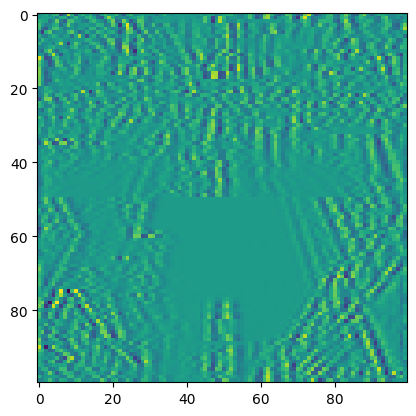

In [ ]:
# 100 x 100 -> view((100, 100))
plt.imshow(broken_image.view(100, 100))

In [ ]:
# 이미지를 오염 시키는 함수
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [ ]:
# 랜덤 텐서를 weird_function() 함수에 입력해 얻은 결과 (가설 텐서)
# 가설 텐서와 오염된 이미지(broken_image) 사이의 오차 -> 함수
# torch.dist() : 두 텐서 사이의 거리를 구하는 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image) # 단순 거리를 오차값으로 설정

In [ ]:
# 경사하강법을 통해서 (가중치 조정을 통해) 언젠가는 원본 이미지 형상을 하게 될 랜덤 텐서
torch.manual_seed(100)
random_tensor = torch.randn(10000, dtype=torch.float) # 1차원 벡터 (10000개)
random_tensor, random_tensor.shape

(tensor([ 0.1268,  1.3564,  0.5632,  ...,  1.0732, -1.1711, -0.6963]),
 torch.Size([10000]))

학습률 `learning rate`
* 경사하강법은 여러 번 반복해서 이뤄짐
* 이때 한 반복에서 최솟점으로 얼마나 많이 이동하는지, 즉 학습을 얼마나 급하게 진행하는지를 정하는 매개변수 = 학습률
* 학습률이 너무 크면 오차 함수(손실 함수)의 최솟점을 찾지 못하고 지나치게 되고, 값이 너무 작으면 학습 속도가 느려짐
![학습률](https://github.com/BigData23th/Data/raw/main/dl_01_02.jpg)

In [ ]:
# 학습률
lr = 0.8

In [ ]:
# 경사하강법을 적용하기 위한 반복문 구현
# 오차 함수를 random_tensor 미분 -> 기울기 -> 가중치 -> 오차 감소
# for i in range(20000):
for i in range(100000):
    random_tensor.requires_grad_(True)
    # random_tensor를 weird_function() 함수에 통과 시킨 후에 hypothesis를 구할 예정
    # 가설을 미분 -> random_tensor.grad -> 미분계수

    hypothesis = weird_function(random_tensor)
    # distanc_loss() 함수에 hypothesis와 broken_image를 입력해서 오차를 개선
    # random_tensor -> (wf) -> hypothesis -> (dist.loss) -> loss -> 미분해서 연쇄법칙
    
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    # loss.backward() 함수를 호출해 loss를 random_tensor 미분
    # 자동 기울기 계산을 비활성화
    with torch.no_grad():
        # 이 안 실행문을 통해서 직접 경사하강법을 구현
        random_tensor = random_tensor - lr * random_tensor.grad
        # random_tensor.grad <- loss.backward() 함수에서 계산한 loss의 기울기
        # loss가 최대값이 되는 곳의 방향
        # -> 이 방향의 반대쪽으로 random_tensor를 lr(학습률)만큼 이동시킴
    if i % 1000 == 0: # % 1000 으로 나눴을 때의 나머지 0 -> 1001, 2001...
        print(f'Loss at {i} = {loss.item()}') # item : 텐서의 스칼라값 추출

Loss at 0 = 0.02116786316037178
Loss at 1000 = 0.02116813138127327
Loss at 2000 = 0.021168187260627747
Loss at 3000 = 0.021168489009141922
Loss at 4000 = 0.021168524399399757
Loss at 5000 = 0.02116853930056095
Loss at 6000 = 0.021168511360883713
Loss at 7000 = 0.021168634295463562
Loss at 8000 = 0.02116883359849453
Loss at 9000 = 0.021169088780879974
Loss at 10000 = 0.02116921916604042
Loss at 11000 = 0.021169332787394524
Loss at 12000 = 0.021169433370232582
Loss at 13000 = 0.02116912603378296
Loss at 14000 = 0.021169446408748627
Loss at 15000 = 0.021169589832425117
Loss at 16000 = 0.021169418469071388
Loss at 17000 = 0.02116941474378109
Loss at 18000 = 0.0211692713201046
Loss at 19000 = 0.021169202402234077
Loss at 20000 = 0.02116907387971878
Loss at 21000 = 0.021168900653719902
Loss at 22000 = 0.021168891340494156
Loss at 23000 = 0.021168911829590797
Loss at 24000 = 0.02116888016462326
Loss at 25000 = 0.02116897515952587
Loss at 26000 = 0.021168865263462067
Loss at 27000 = 0.02116941

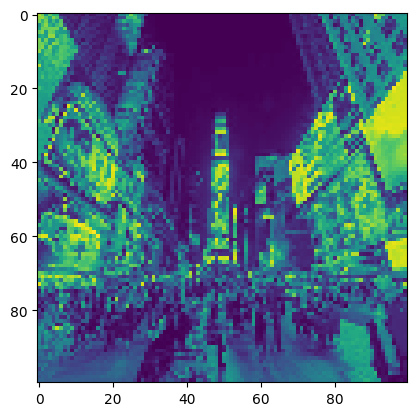

In [ ]:
plt.imshow(random_tensor.view(100, 100).data)

In [ ]:
def epoch_test(epoch):
    torch.manual_seed(100)
    random_tensor = torch.randn(10000, dtype = torch.float)
    
    for i in range(epoch):
        random_tensor.requires_grad_(True)
        hypothesis = weird_function(random_tensor)
        loss = distance_loss(hypothesis, broken_image)
        loss.backward()
        with torch.no_grad():
            random_tensor = random_tensor - lr * random_tensor.grad
        if i % 1000 == 0:
            print(f'Loss at {i} = {loss.item()}')
    
    plt.imshow(random_tensor.view(100, 100).data)

Loss at 0 = 12.521514892578125


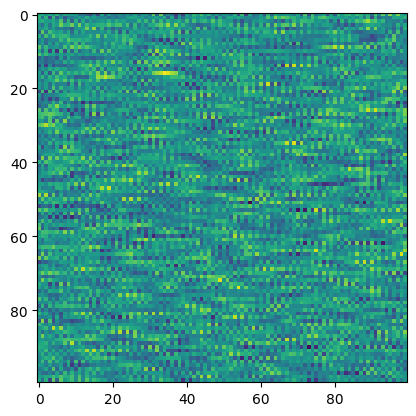

In [ ]:
epoch_test(1000)

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304


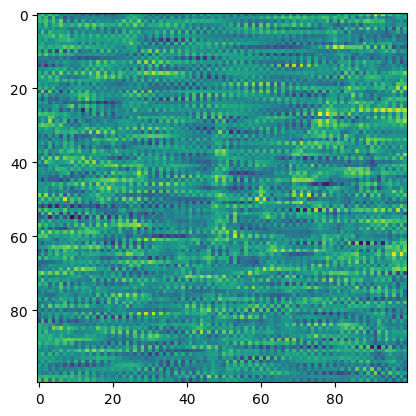

In [ ]:
epoch_test(5000)

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304
Loss at 5000 = 0.24802309274673462
Loss at 6000 = 0.2141505777835846
Loss at 7000 = 0.18697412312030792
Loss at 8000 = 0.16377736628055573
Loss at 9000 = 0.1431426703929901


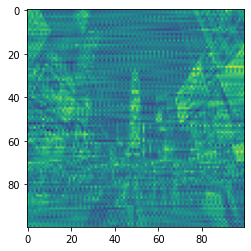

In [ ]:
epoch_test(10000)

Loss at 0 = 12.521514892578125
Loss at 1000 = 1.13249671459198
Loss at 2000 = 0.5303594470024109
Loss at 3000 = 0.37029606103897095
Loss at 4000 = 0.2946311831474304
Loss at 5000 = 0.24802309274673462
Loss at 6000 = 0.2141505777835846
Loss at 7000 = 0.18697412312030792
Loss at 8000 = 0.16377736628055573
Loss at 9000 = 0.1431426703929901
Loss at 10000 = 0.12425555288791656
Loss at 11000 = 0.10661569237709045
Loss at 12000 = 0.08989931643009186
Loss at 13000 = 0.07388725131750107
Loss at 14000 = 0.05842559412121773
Loss at 15000 = 0.04340389743447304
Loss at 16000 = 0.028743894770741463
Loss at 17000 = 0.02115473710000515
Loss at 18000 = 0.02116546966135502
Loss at 19000 = 0.021167242899537086
Loss at 20000 = 0.02116786316037178
Loss at 21000 = 0.02116813138127327
Loss at 22000 = 0.021168187260627747
Loss at 23000 = 0.021168489009141922
Loss at 24000 = 0.021168524399399757
Loss at 25000 = 0.02116853930056095
Loss at 26000 = 0.021168511360883713
Loss at 27000 = 0.021168634295463562
Loss a

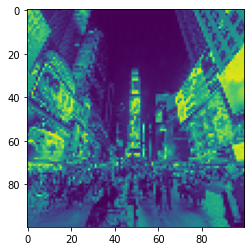

In [ ]:
epoch_test(30000)

# 경사하강법으로 사인 함수 예측

**딥러닝 문제 해결 방식**

모델 정의 -> [모델 순전파 (입력->출력) -> 오차 계산 -> 오차 역전파 (가중치 업데이트)] -> 원하는 만큼 반복 -> 오차 최소화 -> 학습 종료 -> 모델 사용

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

In [ ]:
# 사인 함수의 모양을 예측
# torch.linspace(시작점, 끝점, 갯수) -> 텐서 (1차원 텐서)
# math.pi -> 원주율 파이
x = torch.linspace(-math.pi, math.pi, 1000)
x

tensor([-3.1416, -3.1353, -3.1290, -3.1227, -3.1164, -3.1101, -3.1039, -3.0976,
        -3.0913, -3.0850, -3.0787, -3.0724, -3.0661, -3.0598, -3.0535, -3.0473,
        -3.0410, -3.0347, -3.0284, -3.0221, -3.0158, -3.0095, -3.0032, -2.9969,
        -2.9906, -2.9844, -2.9781, -2.9718, -2.9655, -2.9592, -2.9529, -2.9466,
        -2.9403, -2.9340, -2.9278, -2.9215, -2.9152, -2.9089, -2.9026, -2.8963,
        -2.8900, -2.8837, -2.8774, -2.8711, -2.8649, -2.8586, -2.8523, -2.8460,
        -2.8397, -2.8334, -2.8271, -2.8208, -2.8145, -2.8083, -2.8020, -2.7957,
        -2.7894, -2.7831, -2.7768, -2.7705, -2.7642, -2.7579, -2.7516, -2.7454,
        -2.7391, -2.7328, -2.7265, -2.7202, -2.7139, -2.7076, -2.7013, -2.6950,
        -2.6888, -2.6825, -2.6762, -2.6699, -2.6636, -2.6573, -2.6510, -2.6447,
        -2.6384, -2.6321, -2.6259, -2.6196, -2.6133, -2.6070, -2.6007, -2.5944,
        -2.5881, -2.5818, -2.5755, -2.5693, -2.5630, -2.5567, -2.5504, -2.5441,
        -2.5378, -2.5315, -2.5252, -2.51

In [ ]:
# 실제 사인곡선 y
# x값에 대응되는 사인함수의 결과값
# torch.sin(...) -> 해당 벡터에 있는 값들에 대응하는 사인함수 결과값을 반환
y = torch.sin(x)
y

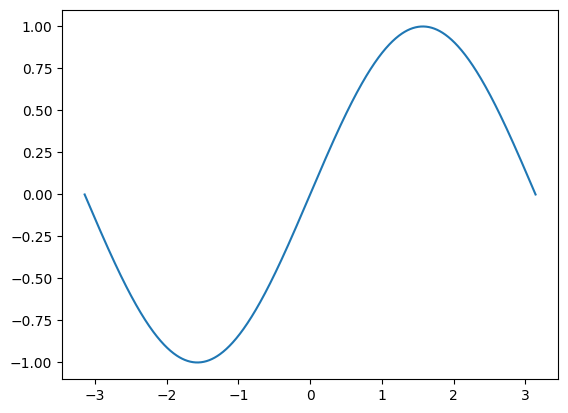

In [ ]:
plt.plot(x, y) # x를 가로축, y를 세로축으로 하는 그래프
plt.show()

$ax^3 + bx^2 + cx + d$<br>
임의의 가중치(계수)를 뽑아서 예측 사인 곡선 => y 만들기

In [ ]:
# y_random = a * x**3 + b * x**2 + c * x + d
torch.manual_seed(500)
# 1개 짜리 랜덤값 (빈 튜플)
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a * x**3 + b * x**2 + c * x + d

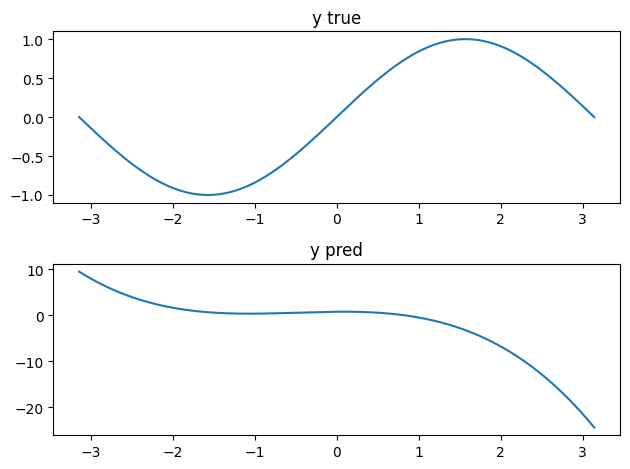

In [ ]:
# 사인곡선 비교
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title('y pred')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

## 학습을 통해 가중치 적용

epoch(199) loss : 389.330078125


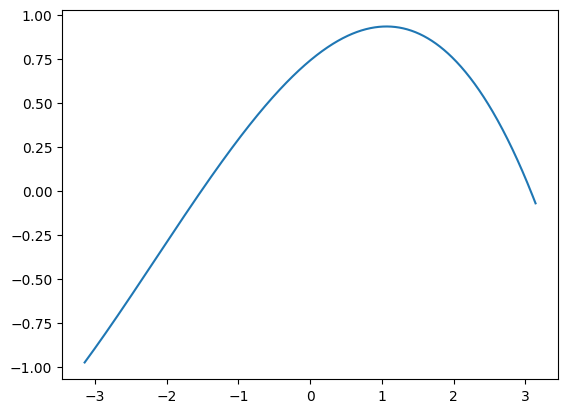

epoch(399) loss : 270.2799072265625


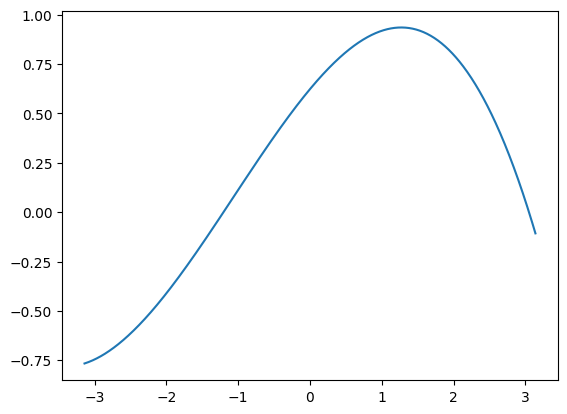

epoch(599) loss : 188.2462921142578


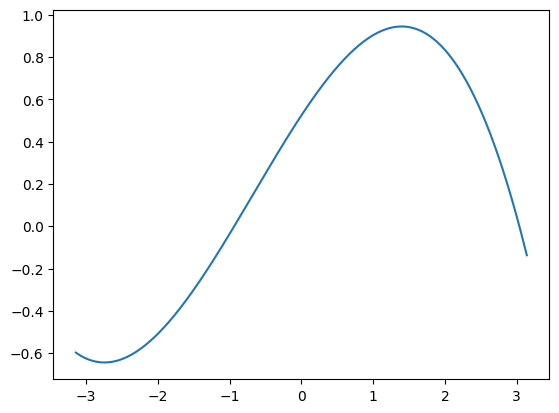

epoch(799) loss : 131.6571044921875


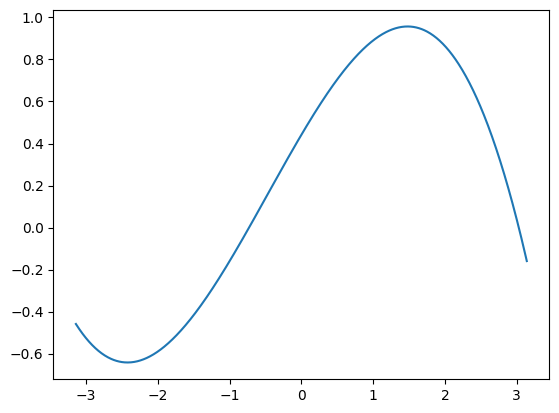

epoch(999) loss : 92.57806396484375


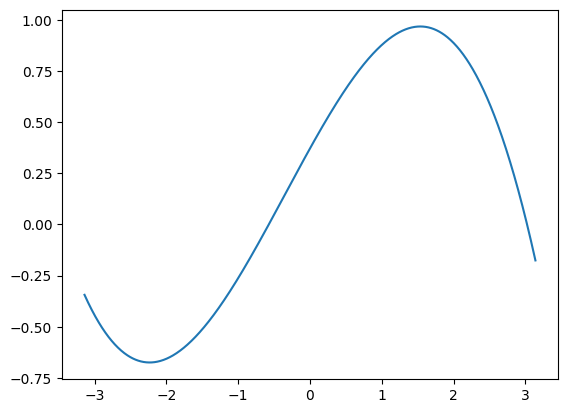

epoch(1199) loss : 65.5623779296875


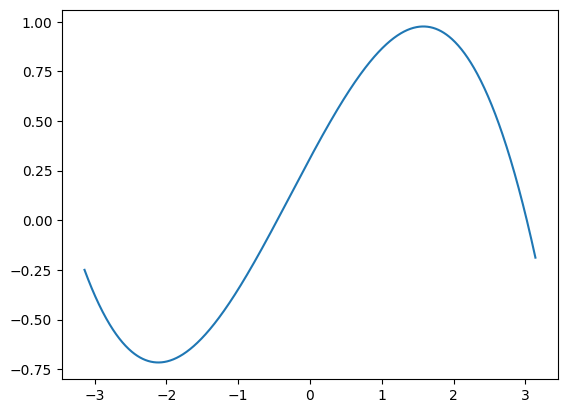

epoch(1399) loss : 46.86677551269531


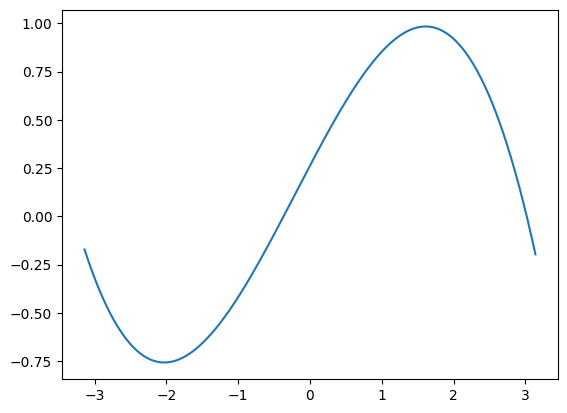

epoch(1599) loss : 33.91588592529297


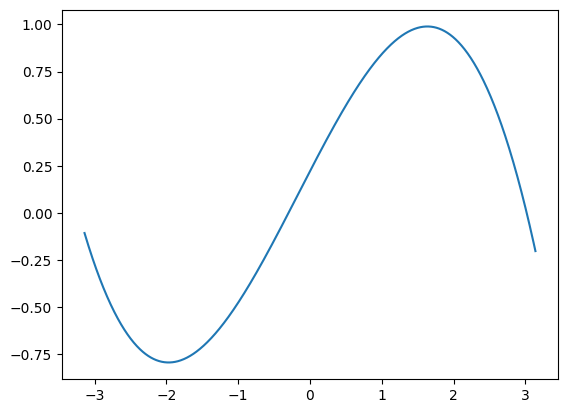

epoch(1799) loss : 24.93551254272461


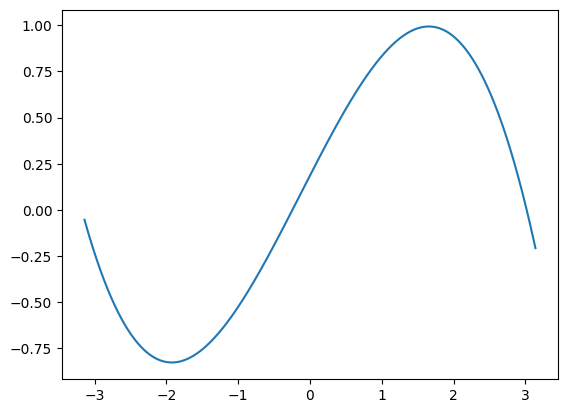

epoch(1999) loss : 18.702457427978516


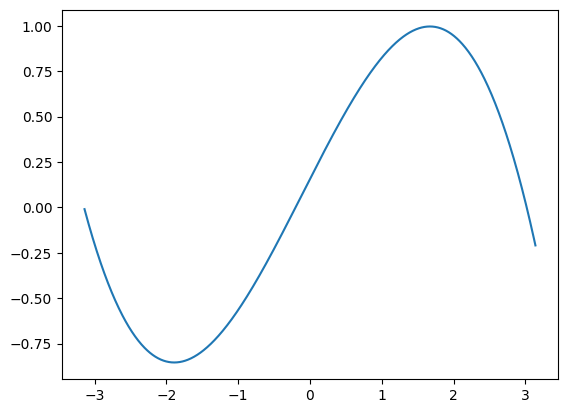

In [ ]:
learning_rate = 1e-6
# 0.000001
# 경사하강법으로 구해진 기울기를 얼마나 반영할건지

# 학습은 2000번
for epoch in range(2000):
    # 랜덤하게 생성된 a, b, c, d 계수로 구성된 삼차함수 곡선
    y_pred = a * x**3 + b * x**2 + c * x + d
    # tensor
    # y = 실제 사인 함수를 사용해서 구한 값 (정답) - 실제값
    # y_pred = 예측값
    # y_pred - y = 손실(오차) = squared_error : 오차의 제곱(pow(2))을 sum 더해서
    dist = y_pred - y
    # .pow(몇제곱) / .sum() / .item() -> 한 개의 스칼라값만 추출
    loss = dist.pow(2).sum().item()
    # (예측값 - 실제값) ^ 2 -> 합
    if epoch % 200 == 199:
        print(f"epoch({epoch}) loss : {loss}") # 손실을 보여줌
        plt.plot(x, y_pred)
        plt.show()
    
    # 경사하강법으로 새로운 가중치 (새로운 계수)
    # y_pred - y (dist)
    # backward 해주는 작업 (연쇄 체인)
    # 기울기의 미분값
    grad_y_pred = 2.0 * (y_pred - y) # 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()
    
    # a, b, c, d 계수 - 가중치를 반영
    # -= 빼고 그 값을 대입 / +=
    # 가중치를 업데이트 (기울기의 반대방향 * -1)
    # 오차가 작아지는 방향
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

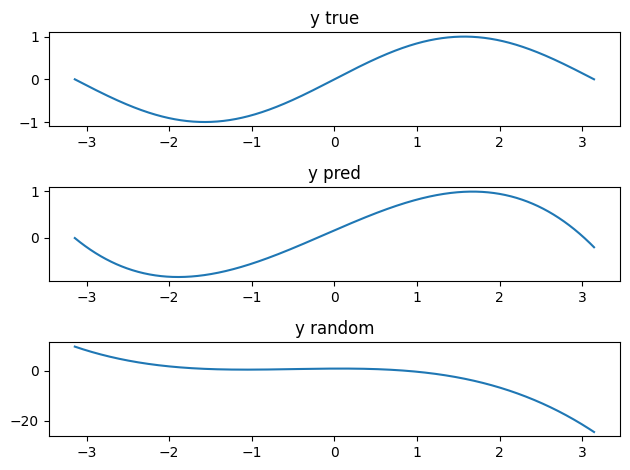

In [ ]:
# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(x, y_random)

# 출력
plt.tight_layout()
plt.show()